### K-Means方法压缩图片

(614, 1225, 3)


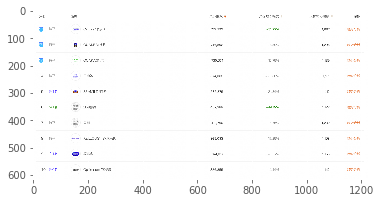

In [24]:
flower = cv2.imread('pic.png')
plt.imshow(flower)
print(flower.shape)

In [25]:
print(flower.shape)
flower = np.array(flower, dtype=np.float64) / 255  # 把RGB值映射到[0, 1]区间
print(flower.shape)
w, h, d = original_shape = tuple(flower.shape)
image_array = np.reshape(flower, (w * h, d))  # 展开所有像素

(614, 1225, 3)
(614, 1225, 3)


In [26]:
def plot_image(img, title, ax=plt):
    ax.imshow(img)
    ax.title.set_text(title)

In [27]:
def recreate_image(img_array, labels, w, h):
    """把展开的像素点重新组合为图片"""
#     d = img_array.shape[1]  # 颜色通道数
    image = np.zeros((w, h, 3))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = img_array[labels[label_idx]]
            label_idx += 1
    return image

In [28]:
def image_compression(n_colors=4, n_samples=1000):
    global image_array
    image_array_sample = shuffle(image_array, random_state=0)[:n_samples]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    img_compressed = recreate_image(kmeans.cluster_centers_, labels, w, h)
    fig, ax = plt.subplots(1,2, figsize=(16,6));
    plot_image(flower, 'Original', ax[0])
    plot_image(img_compressed, 'K-Means', ax[1])
    return img_compressed

In [29]:
interact(
    image_compression,
    n_colors=widgets.IntText(value=4),
    n_samples=widgets.IntText(value=1000)
);

interactive(children=(IntText(value=4, description='n_colors'), IntText(value=1000, description='n_samples'), …

## Worshop Session & Discussion
- Session1:
重构`find_clusters`方法，使其可读性更高，或更加robust（主要是在这个过程中真正理解K-Means聚类算法）
- Session2:
任选一张图片，对其进行K-Means颜色压缩

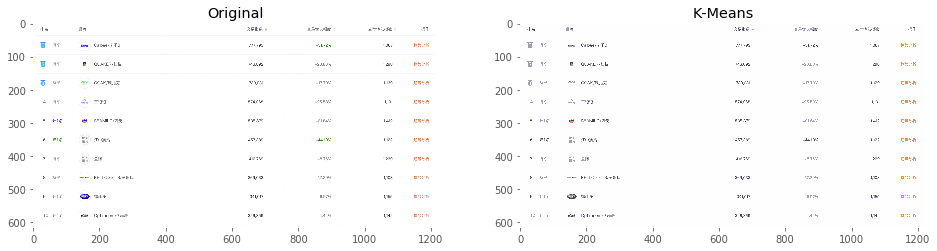

In [30]:
img = image_compression(4,1000)

In [31]:
type(img)

numpy.ndarray

In [32]:
img.shape

(614, 1225, 3)

In [33]:
img=img*255

In [34]:
img.astype(np.uint8)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [35]:
cv2.imwrite('pro.png',img)

True